# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set([label for label in y_train] + [label for label in y_test]))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd

Index  21378
Class ID  13
Sign Name:  Yield


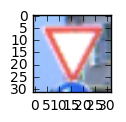

In [4]:
index = random.randint(0, X_train.shape[0])
df_signnames = pd.read_csv('./signnames.csv')
print('Index ', index)
print('Class ID ', y_train[index])
print('Sign Name: ', df_signnames[df_signnames['ClassId'] == y_train[index]]['SignName'].values[0])
plt.figure(figsize=(1, 1))
plt.imshow(X_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import numpy as np

# normalize if not normalized yet
if np.max(X_train) > 1:
    X_train = X_train / 255
else:
    print('Train data is already normalized.')
    
if np.max(X_test) > 1:
    X_test = X_test / 255
else:
    print('Test data is alreadly normalized.')

In [6]:
# Check the nomalization has been done successfully
import math

assert(math.isclose(np.min(X_train), 0, abs_tol=1e-5))
assert(math.isclose(np.max(X_train), 1, abs_tol=1e-5))
assert(math.isclose(np.min(X_test), 0, abs_tol=1e-5))
assert(math.isclose(np.max(X_test), 1, abs_tol=1e-5))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
- Normalize the data. That is, I rescaled every value in the data to the float value between 0 and 1 (0 is the minimum value of image values and 1 is the maximum value of image values).
  -  Because normalization enables the model to work on differently scaled image data later. The model is able to learn and predict equally if images are normalized.
- Not converting images to gray scale
  - Because colors seems important to classify traffic signs. 

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('Number of the original train data: ', X_train.shape[0])
print('Number of the train data for validation: ', X_train_sub.shape[0])
print('Number of the validation data: ', X_validation.shape[0])

Number of the original train data:  39209
Number of the train data for validation:  31367
Number of the validation data:  7842


In [8]:
# ratio of each dataset to whole dataset
print(X_train_sub.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print(X_validation.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print(X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))

0.6050849746329984
0.1512760662821428
0.24363895908485889


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
<br>&nbsp;&nbsp;
I used the original test data for the testing data.
<br>&nbsp;&nbsp;
I split the original train data into random training data and validation data. The size of the training data is 80% of the original train data and the size of the validation data is 20%. As a whole, I have 31,367 samples for the training data, 7,842 samples for the validation data and 12,630 samples for the testing data, and hence I have 61% samples for the training data, 15% for the validation data and 24% for the testing data.
<br>&nbsp;&nbsp;
I didn't split the data in stratified way, which means I might have some traffic sign classes in the training data and less in the validation data, and vice versa.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# parameter for weights intialization
mu = 0
sigma = 0.1


def LeNet(x):
    # Layer 1: Convolutional.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma, name='conv1_W'))
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='l3_W')
    fc1_b = tf.Variable(tf.zeros(120), name='l3_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='l4_W')
    fc2_b  = tf.Variable(tf.zeros(84), name='l4_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma), name='l5_W')
    fc3_b  = tf.Variable(tf.zeros(43), name='l5_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
- My final architecture is what is called LeNet.
- It has 5 layers:
  - Layer 1: Convolution, ReLu activation, Pooling, Input = 32x32x1 and Output = 28x28x6
  - Layer 2: Convolution, ReLu activation, Pooling, Input = 28x28x6 and Output = 14x14x6
  - Layer 3: Fully connected, Input = 400 and Output = 120
  - Layer 4: Fully connected, Input = 120 and Output = 84
  - Layer 5: Fully connected, Input = 84 and Output = 10.

### Train the model

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='features')
y = tf.placeholder(tf.int32, (None), name='labels')
one_hot_y = tf.one_hot(y, 43, name='one_hot')

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y, name='cross_entropy')
loss_operation = tf.reduce_mean(cross_entropy, name='loss_op')
optimizer = tf.train.AdamOptimizer(learning_rate=rate, name='optimizer')
training_operation = optimizer.minimize(loss_operation, name='train_op')

correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(one_hot_y, axis=1), name='correct_preds')
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='acc_op')
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_train[offset: offset + BATCH_SIZE], y_train[offset: offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

In [11]:
import os 

from sklearn.utils import shuffle


EPOCHS = 10
BATCH_SIZE = 128

model_save_directory = './models/Final/'
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)

In [12]:
# Training the Network
with tf.Session() as sess:
    # initialize variables
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    save_path = saver.save(sess, model_save_directory + 'model.ckpt')
    print("Model saved in file: %s" % save_path)

EPOCH 1
Validation Accuracy = 0.811
EPOCH 2
Validation Accuracy = 0.911
EPOCH 3
Validation Accuracy = 0.957
EPOCH 4
Validation Accuracy = 0.972
EPOCH 5
Validation Accuracy = 0.979
EPOCH 6
Validation Accuracy = 0.989
EPOCH 7
Validation Accuracy = 0.991
EPOCH 8
Validation Accuracy = 0.990
EPOCH 9
Validation Accuracy = 1.000
EPOCH 10
Validation Accuracy = 0.999
Model saved in file: ./models/Final/model.ckpt


### Test the model

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_save_directory))
    
    test_accuracy = evaluate(X_test, y_test)
    print('Test accuracy = {:.3f}'.format(test_accuracy))

Test accuracy = 0.991


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Optimizer: Adam
- Batch size: 128
- Epochs: 10
- Learning rate: 0.001
- weights: generated from truncated normal distribution of mean = 0 and stddev = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
<br>&nbsp;&nbsp; 
My solution involved the already known architecture called LeNet. LeNet is good at recognizing hand written digit images. As it is suitable at some kind of image recognition, I think it can be also suitable for other kind of image recognition problems like the traffic sign recognition.
<br>&nbsp;&nbsp; 
The LeNet architecture is one of the architectures called CNN (Convolutional Neural Network). CNN is inspired by the animal visual cortex and it has convolutional layers, which enable the network to perform well on image recognition. I implemented two convolutinal layers in my solution. 
<br>&nbsp;&nbsp;
I chose the Rectified Linear Unit for the activation function. ReLU has some kind of biological plausibility (cf. <a href="https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Advantages">ReLU Advantages</a>). Because of this plausibility, it seems that ReLU works well with CNN (, which is inspired by the animal organization).
<br>&nbsp;&nbsp; 
My solution has also Pooling layers. Pooling layers downsample their inputs and reduce the size of them. Images can often be huge inputs, so downsampling them in Pooling layers is useful to let other layers after work well.
<br>&nbsp;&nbsp; 
Final layer of my solution, which is an output layer has the softmax function as the activation function. This traffic sign problem is one of the classification problems, so it requires probabilities of which data belongs to which class. Softmax function takes inputs and produce outputs that is interpreted as probabilities. Hence, this is suitable for this classification problem.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Preprocessing on the new images are detailed in [**preprocess_new_image.ipynb**](./preprocess_new_image.ipynb)

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# comment out the below line because I chose 5 candidates after
# new_image_file_path = [file for file in os.listdir('./data/new_image/') if file.startswith('preprocessed_')]

# I chose the images from No. 7 to 11 as 5 candidates
five_candidates = ['./data/new_image/preprocessed_{}.png'.format(n) for n in range(7, 12)]
images_candidate = [mpimg.imread(image) for image in five_candidates]

# preprocess the images
# remove the channel of alpha (because I don't need the channel) and leave only RGB channel
X_new = np.array([image[:, :, :3] for image in images_candidate])
# and check the shape of images
for image in X_new:
    assert(image.shape == (32, 32, 3))

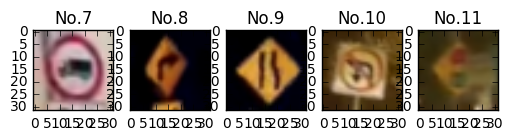

In [15]:
# Plot the 5 candidates images
fig, axes = plt.subplots(1, 5)
for i, axis in enumerate(axes):
    axis.imshow(X_new[i])
    axis.set_title('No.{}'.format(i + 7))
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- 5 candidate new images of traffic signs are above: from No.7 to No.11
-  No.11, classification might be difficult. The sign is not clear due to an obstacle.

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

pred = tf.argmax(logits, axis=1)

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_save_directory))
    
    preds = sess.run(pred, feed_dict={x: X_new})
    print(preds)

[16  4 12  0 12]


In [17]:
for i, class_id in enumerate(preds):
    print('No.{}: '.format(i + 7), df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0])

No.7:  Vehicles over 3.5 metric tons prohibited
No.8:  Speed limit (70km/h)
No.9:  Priority road
No.10:  Speed limit (20km/h)
No.11:  Priority road


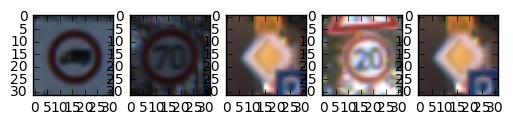

In [31]:
# Plot correct images of predicted class id
fig, axes = plt.subplots(1, preds.shape[0])
plt.figure(figsize=(1, 1))

for i, axis in enumerate(axes):
    image_no = i + 7
    class_id = preds[i]
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    axis.imshow(X_train[y_train == class_id][0])
    # TODO: set title for each image
    #axis.set_title('No. {}, Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name))
plt.show()

### Check with the 6 remaining new images

In [32]:
remained_images = ['./data/new_image/preprocessed_{}.png'.format(i) for i in range(1, 7)]
remained_images = [mpimg.imread(image) for image in remained_images]
X_new_remained = np.array([image[:, :, :3] for image in remained_images])
# and check the shape of images
for image in X_new_remained:
    assert(image.shape == (32, 32, 3))

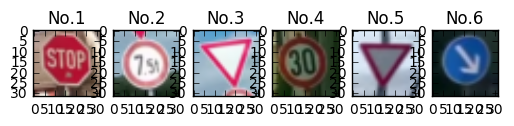

In [39]:
# Plot the remained images
fig, axes = plt.subplots(1, len(X_new_remained))

for i, axis in enumerate(axes):
    axis.imshow(X_new_remained[i])
    axis.set_title('No.{}'.format(i + 1))
plt.show()

In [35]:
# Predict with 6 new images above
pred = tf.argmax(logits, axis=1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/Final/'))
    
    preds = sess.run(pred, feed_dict={x: X_new_remained})
    print(preds)

[14  4 13  1 13 38]


In [36]:
# correct sign names of the prediction above
for i, class_id in enumerate(preds):
    print('No.{}: '.format(i + 1), df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0])

No.1:  Stop
No.2:  Speed limit (70km/h)
No.3:  Yield
No.4:  Speed limit (30km/h)
No.5:  Yield
No.6:  Keep right


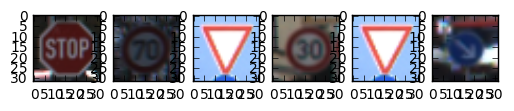

In [37]:
# Plot correct images of predicted class id
fig, axes = plt.subplots(1, preds.shape[0])
plt.figure(figsize=(1, 1))

for i, axis in enumerate(axes):
    image_no = i + 1
    class_id = preds[i]
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    axis.imshow(X_train[y_train == class_id][0])
    # TODO: set title for each image
    #axis.set_title('No. {}, Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name))
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
<br>&nbsp;&nbsp;
My model does not seem to perform well on 5 new images from No.7 to No.11. The accuracy manually computed is 20% (No.7 is correct, No.8 is not correct, No.9 is not correct, No.10 is not correct, No.11 is not correct) while the validation accuracy is 99.9% and test accuracy is 99.1%. 
<br>&nbsp;&nbsp;
My model is not good at predicting on images that it has never learned before. It has never seen images like the images from No.8 to No.11and No.2 above and falied to predict on them correctly. It seems that there are some pattern in its incorrect predictions. It seems that the model try to predict the class ids of images which is known and similar to unknown images it has to predict.
<br>&nbsp;&nbsp;
On the other hand, my model is pretty good at predicting on images that it has learned before. It predicts correctly on the new image No.7 and the new images from No.1 to No.6 except No.2. 
<br>&nbsp;&nbsp;
The conclusion is that the model performs very well on images it has learned before but does not perform well on images it has never learned before. However it seems reasonable because humans also may not be able to predict the class of the traffic sign that they have never seen before.

In [40]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
k = 3
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=k)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/Final/'))
    
    top_k_new = sess.run(top_k, feed_dict={x: X_new})
    top_k_new_remained = sess.run(top_k, feed_dict={x: X_new_remained})

In [41]:
# Top k predictions with the new image from No.7 to No.11
# No.9, certain about prediction, which is not correct
top_k_new

TopKV2(values=array([[  9.96194839e-01,   3.75906378e-03,   4.60417687e-05],
       [  7.15401232e-01,   2.84398198e-01,   1.53803732e-04],
       [  9.88812566e-01,   6.27256231e-03,   4.56824992e-03],
       [  6.78324878e-01,   2.07321689e-01,   9.65491682e-02],
       [  5.40129304e-01,   2.32018113e-01,   1.93594098e-01]], dtype=float32), indices=array([[16, 40,  9],
       [ 4, 14, 26],
       [12,  4,  1],
       [ 0,  4,  7],
       [12, 14,  1]], dtype=int32))

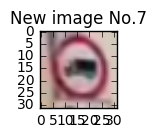

Class ID = 16, sign name = Vehicles over 3.5 metric tons prohibited, probability = 0.9961948394775391
Class ID = 40, sign name = Roundabout mandatory, probability = 0.0037590637803077698
Class ID = 9, sign name = No passing, probability = 4.604176865541376e-05


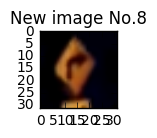

Class ID = 4, sign name = Speed limit (70km/h), probability = 0.7154012322425842
Class ID = 14, sign name = Stop, probability = 0.2843981981277466
Class ID = 26, sign name = Traffic signals, probability = 0.0001538037322461605


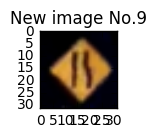

Class ID = 12, sign name = Priority road, probability = 0.9888125658035278
Class ID = 4, sign name = Speed limit (70km/h), probability = 0.006272562313824892
Class ID = 1, sign name = Speed limit (30km/h), probability = 0.004568249918520451


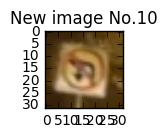

Class ID = 0, sign name = Speed limit (20km/h), probability = 0.6783248782157898
Class ID = 4, sign name = Speed limit (70km/h), probability = 0.20732168853282928
Class ID = 7, sign name = Speed limit (100km/h), probability = 0.09654916822910309


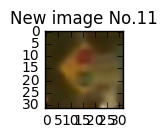

Class ID = 12, sign name = Priority road, probability = 0.5401293039321899
Class ID = 14, sign name = Stop, probability = 0.2320181131362915
Class ID = 1, sign name = Speed limit (30km/h), probability = 0.1935940980911255


In [65]:
# Visualize each new image with top 3 predictions and probabilities
for i in range(len(X_new)):

    plt.figure(figsize=(1, 1))
    plt.title('New image No.{}'.format(i + 7))
    plt.imshow(X_new[i])
    plt.show()

    for class_id, values in zip(top_k_new.indices[i], top_k_new.values[i]):
        sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
        print('Class ID = {}, sign name = {}, probability = {}'.format(class_id, sign_name, values))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
- New image No.7: <br>the model is very certain of its 1st prediction (99.6%) and able to predict correctly.
- New image No.8: <br>the model is a little uncertain of its prediction (71.5% certain of its 1st prediction) and failed to predict correctly.
- New image No.9: <br>the model is confident in its prediction (98.8%) but falied to predict correctly. Incorrect prediction with high confidence seems dangerous.
- New image No.10: <br>the model is a little uncertain of its prediction (67.8% certain of its 1st prediction). Among similar candidates (speed limit 20km/h, 70km/h and 100km/h), It seems not to be able to decide predictions with confidence.
- New image No.11: <br>the model is least certain of its prediction in the new images from No.7 to No.11. It is 54% confident in its 1st prediction. This result seems reasonable because the No.11 seems to difficult to predict correctly with an obstacle in front of its traffic sign. In this case, the model should not be confident in its prediction because wrong confidence will lead to wrong outcome.

As a whole, except No.9, the model is certain with images it has seen before, but relatively uncertain with images it has never seen before.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.